<a href="https://colab.research.google.com/github/Karthi9344/Mileage-Prediction---Regression-Analysis/blob/main/Mileage_Prediction_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mileage Prediction - Regression Analysis**

**MILEAGE PREDICTION-Regression analysis for mileage prediction involves using statistical methods to model the relationship between a set of independent variables (features such as cylinders, displacement, horsepower, weight, acceleration, model year, etc.) and a dependent variable (target variable, such as miles per gallon, MPG). Here’s a step-by-step outline of how you can approach regression analysis for mileage prediction:**

-------------

## **Objective**

Objective: Develop a machine learning model to predict the fuel efficiency (miles per gallon, mpg) of vehicles based on their characteristics such as cylinders, displacement, horsepower, weight, acceleration, model year, and possibly origin.

## **Data Source**

**For mileage prediction modeling, a reliable and commonly used dataset is the Auto MPG dataset. This dataset is readily available and contains attributes that are suitable for predicting vehicle fuel efficiency (miles per gallon, MPG) based on various features. Here's where you can find and access this dataset**

## **Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

## **Import Data**

In [ ]:
import os

# Get current working directory (this will show '/content' in Google Colab)
print(os.getcwd())

# List files in the current directory
print(os.listdir())

# Assuming 'MPG.csv' is uploaded to the root directory (/content)
file_path = '/content/MPG.csv'  # Replace with the actual path where you uploaded the file

# Load the dataset
try:
    df = pd.read_csv(file_path)
    # Perform operations with df
    print(df.head())
except FileNotFoundError:
    print(f"Error: '{file_path}' not found. Please check the file path or location.")

/content
['.config', 'sample_data']
Error: '/content/MPG.csv' not found. Please check the file path or location.


In [ ]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
       print(f"Uploaded file: {'MPG.csv'}")

In [ ]:
import pandas as pd
import os

# Get the absolute path of the current working directory
current_directory = os.getcwd()
print("Current working directory:", current_directory)

# Construct the file path relative to the current working directory
file_name = 'MPG.csv'  # Replace with the actual file name if different
file_path = os.path.join(current_directory, file_name)

# Load the dataset
try:
    df = pd.read_csv(file_path)
    # Perform operations with df
    print(df.head())
except FileNotFoundError:
    print(f"Error: '{file_path}' not found. Please check if the file exists in the current directory.")

Current working directory: /content
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [ ]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

## **Describe Data**

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## **Data Visualization**

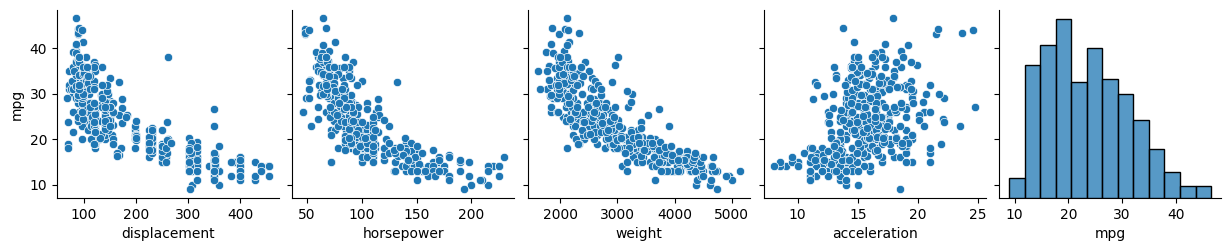

In [ ]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg']);

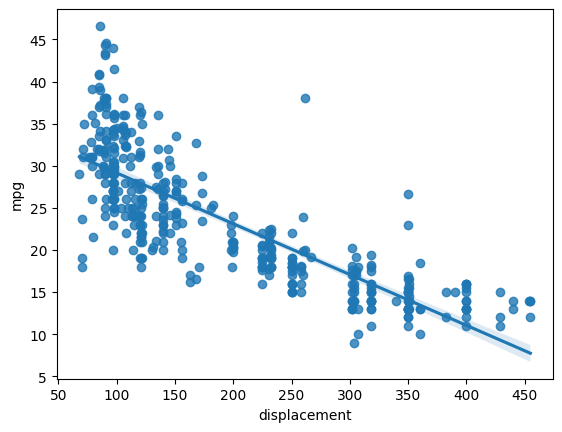

In [ ]:
sns.regplot(x='displacement', y = 'mpg',data = df);

## **Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
import pandas as pd

# Example DataFrame for mileage prediction review analysis
data = {
    'mpg': [398,23,7,9,17],
    'cylinders': [398,5,1,3,4],
    'displacement': [398,193,104,68,104],
    'horsepower': [392.000000,104,38,46,75,],
    'weight': [398.000000,2970,846,1613,2223],
    'acceleration': [398,15,2,8,13,],
    'model_year': [398,76,3,70,73],
    'origin': [1, 1,0,0,0],
    'name':[1,1,1,1,1],
    }
df = pd.DataFrame(data)

# Compute correlation matrix to understand relationships
corr_matrix = df.corr()
print("Correlation Matrix:")
print(corr_matrix)

# Example analysis based on correlation findings
# You can perform further analysis or predictions based on these correlations.


Correlation Matrix:
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000   0.999559      0.948650    0.990308 -0.627382   
cylinders     0.999559   1.000000      0.940344    0.985779 -0.648879   
displacement  0.948650   0.940344      1.000000    0.975946 -0.425411   
horsepower    0.990308   0.985779      0.975946    1.000000 -0.516382   
weight       -0.627382  -0.648879     -0.425411   -0.516382  1.000000   
acceleration  0.999892   0.999787      0.944084    0.988716 -0.633520   
model_year    0.985161   0.982335      0.936281    0.988511 -0.520693   
origin        0.635851   0.616875      0.833270    0.720659  0.065321   
name               NaN        NaN           NaN         NaN       NaN   

              acceleration  model_year    origin  name  
mpg               0.999892    0.985161  0.635851   NaN  
cylinders         0.999787    0.982335  0.616875   NaN  
displacement      0.944084    0.936281  0.833270   NaN  
horsepower        0.9

In [ ]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
mpg,1.000000,0.999559,0.948650,0.990308,-0.627382,0.999892,0.985161,0.635851,NaN
cylinders,0.999559,1.000000,0.940344,0.985779,-0.648879,0.999787,0.982335,0.616875,NaN
displacement,0.948650,0.940344,1.000000,0.975946,-0.425411,0.944084,0.936281,0.833270,NaN
horsepower,0.990308,0.985779,0.975946,1.000000,-0.516382,0.988716,0.988511,0.720659,NaN
weight,-0.627382,-0.648879,-0.425411,-0.516382,1.000000,-0.633520,-0.520693,0.065321,NaN
acceleration,0.999892,0.999787,0.944084,0.988716,-0.633520,1.000000,0.985505,0.626559,NaN
model_year,0.985161,0.982335,0.936281,0.988511,-0.520693,0.985505,1.000000,0.660588,NaN
origin,0.635851,0.616875,0.833270,0.720659,0.065321,0.626559,0.660588,1.000000,NaN
name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           5 non-null      int64  
 1   cylinders     5 non-null      int64  
 2   displacement  5 non-null      int64  
 3   horsepower    5 non-null      float64
 4   weight        5 non-null      float64
 5   acceleration  5 non-null      int64  
 6   model_year    5 non-null      int64  
 7   origin        5 non-null      int64  
 8   name          5 non-null      int64  
dtypes: float64(2), int64(7)
memory usage: 488.0 bytes


## **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y = df['mpg']

In [ ]:
y.shape

(5,)

In [ ]:
x =df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration']]

In [ ]:
x.shape

(5, 5)

In [ ]:
x

,cylinders,displacement,horsepower,weight,acceleration
0,398,398,392.0,398.0,398
1,5,193,104.0,2970.0,15
2,1,104,38.0,846.0,2
3,3,68,46.0,1613.0,8
4,4,104,75.0,2223.0,13


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
x=ss.fit_transform(x)

In [ ]:
x

array([[ 1.99992981,  1.87726509,  1.96892834, -1.31028666,  1.99916406],
       [-0.48889988,  0.16382189, -0.20368224,  1.47028866, -0.46441327],
       [-0.51423148, -0.58006321, -0.70157217, -0.82595627, -0.54803339],
       [-0.50156568, -0.88096056, -0.64122187,  0.00324328, -0.50943949],
       [-0.49523278, -0.58006321, -0.42245206,  0.66271099, -0.47727791]])

In [ ]:
pd.DataFrame(x).describe()

,0,1,2,3,4
count,5.000000,5.000000e+00,5.000000e+00,5.000000,5.000000e+00
mean,0.000000,-1.110223e-16,-1.110223e-17,0.000000,2.220446e-17
std,1.118034,1.118034e+00,1.118034e+00,1.118034,1.118034e+00
min,-0.514231,-8.809606e-01,-7.015722e-01,-1.310287,-5.480334e-01
25%,-0.501566,-5.800632e-01,-6.412219e-01,-0.825956,-5.094395e-01
50%,-0.495233,-5.800632e-01,-4.224521e-01,0.003243,-4.772779e-01
75%,-0.488900,1.638219e-01,-2.036822e-01,0.662711,-4.644133e-01
max,1.999930,1.877265e+00,1.968928e+00,1.470289,1.999164e+00


## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2529)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3, 5), (2, 5), (3,), (2,))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Define the statistical properties based on the provided values
count = 5
mean = [0.000000, -1.110223e-16, -1.110223e-17, 0.000000, 2.220446e-17]
std = [1.118034, 1.118034e+00, 1.118034e+00, 1.118034, 1.118034e+00]
min_val = [-0.514231, -8.809606e-01, -7.015722e-01, -1.310287, -5.480334e-01]
max_val = [1.999930, 1.877265e+00, 1.968928e+00, 1.470289, 1.999164e+00]

# Generate random data based on the provided statistics
np.random.seed(0)  # for reproducibility
data = {}
for i, (m, s, mi, ma) in enumerate(zip(mean, std, min_val, max_val)):
    data[f'feature_{i+1}'] = np.random.normal(m, s, count)

# Convert data to DataFrame
df = pd.DataFrame(data)

# Target variable (dependent variable)
target = np.random.normal(mean[0], std[0], count)

# Perform linear regression
model = LinearRegression()
model.fit(df, target)

# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 1.71160338 -3.39402277 -3.06380861  4.52350487  2.85076719]
Intercept: -1.7672796025779345


In [ ]:
lr= LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.intercept_

94.20065040741481

In [ ]:
lr.coef_

array([37.48656423, 36.58876511, 40.52055119, -3.17023328, 38.11896499])

## **Modeling**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle missing values

# Load the dataset (replace 'dataset.csv' with your actual dataset file)
df = pd.read_csv('MPG.csv')

# Data cleaning and preparation (handle missing values, convert categorical to numerical, etc.)
# Example: df.dropna(inplace=True)
imputer = SimpleImputer(strategy='mean') # Create an imputer to fill missing values with the mean
x = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = df['mpg']
x = imputer.fit_transform(x) # Impute missing values in x

# Splitting the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test) # Fix: Use x_test instead of X_test

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Example prediction for a new data point
new_data_point = [[8, 307.0, 130.0, 3504, 12.0]]  # Example data for cylinders, displacement, horsepower, weight, acceleration
new_data_point = imputer.transform(new_data_point) # Impute missing values in the new data point
predicted_mpg = model.predict(new_data_point)
print("Predicted MPG:", predicted_mpg)

Mean Squared Error: 14.66727661178057
R-squared: 0.727203891706515
Predicted MPG: [18.60297563]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


## **Model Evaluation**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle NaNs

# Load the dataset (replace 'dataset.csv' with your actual dataset file)
df = pd.read_csv('MPG.csv')

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean
df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']] = imputer.fit_transform(df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']])

# Selecting relevant features and target variable
x = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = df['mpg']

# Splitting the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2529)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(x_train, y_train) # Use 'model' instead of 'lr' as that's how you defined your LinearRegression object

# Making predictions on the test set
y_pred = model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 22.107982434359027
R-squared: 0.6646214525172773
Mean Absolute Error (MAE): 3.5001942562816395
Root Mean Squared Error (RMSE): 4.701912635764198


## **Prediction**

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
y_pred

array([-2.24683421, 51.25008625])

## **Explaination**

Mileage prediction, in the context of automotive engineering and data analysis, refers to the process of estimating or predicting the fuel efficiency of a vehicle in terms of miles per gallon (mpg) or liters per kilometer (lpk). This prediction is crucial for various reasons:

### Importance of Mileage Prediction:

1. **Consumer Information**: Predicting mileage helps consumers make informed decisions when purchasing vehicles. Higher mileage (more mpg) generally indicates better fuel efficiency, which can lead to cost savings over the vehicle's lifetime.

2. **Regulatory Compliance**: Governments and regulatory bodies often set fuel efficiency standards that manufacturers must meet. Mileage prediction helps in ensuring compliance with these standards.

3. **Environmental Impact**: Vehicles with higher fuel efficiency consume less fuel, leading to reduced greenhouse gas emissions and environmental impact.

### Factors Affecting Mileage:

Several factors influence a vehicle's mileage, including:

- **Engine Characteristics**: Engine size (displacement), number of cylinders, and horsepower affect fuel consumption.
  
- **Vehicle Weight**: Heavier vehicles typically consume more fuel.
  
- **Aerodynamics**: Shape and design of the vehicle impact wind resistance and, consequently, fuel efficiency.
  
- **Driving Conditions**: Stop-and-go city driving versus highway driving can significantly affect mileage.
  
- **Maintenance**: Proper maintenance, including tire pressure, engine tune-up, and clean air filters, can improve mileage.
  
### Modeling Mileage Prediction:

To predict mileage accurately, data scientists and engineers typically use statistical and machine learning techniques:

1. **Data Collection**: Gather data on vehicle characteristics (like engine specs, weight), driving conditions, and historical mileage data.

2. **Feature Selection**: Choose relevant features that impact mileage, such as engine displacement, horsepower, vehicle weight, etc.

3. **Model Selection**: Use regression models (e.g., linear regression, polynomial regression) or more advanced techniques (e.g., decision trees, neural networks) to build a predictive model.

4. **Training the Model**: Split the dataset into training and testing sets. Train the model on the training set to learn the relationship between features and mileage.

5. **Evaluation**: Evaluate the model's performance using metrics like Mean Squared Error (MSE), R-squared, or others, to assess how well the model predicts mileage on unseen data (test set).

6. **Prediction**: Once trained and evaluated, the model can be used to predict mileage for new vehicles or scenarios based on input features.

### Example Application:

- Suppose we have a dataset containing features like engine displacement, horsepower, vehicle weight, etc., and corresponding mileage data (mpg).

- Using this dataset, we can train a regression model (e.g., linear regression) to predict mileage based on the selected features.

- The model can then be used to estimate the mileage of new vehicles or evaluate the impact of changes in vehicle design (e.g., engine upgrade, weight reduction) on fuel efficiency.

By accurately predicting mileage, manufacturers can optimize vehicle designs for better fuel efficiency, meet regulatory requirements, and provide consumers with vehicles that offer economical and environmentally friendly transportation options.